In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

In [3]:
dataO = pd.read_csv('WESAD_Oversample.csv')

In [4]:
dataO

,ACC_0,ACC_1,ACC_2,BVP,EDA,TEMP,labels
0,55.000000,-32.000000,44.000000,30.520000,1.634132,35.810000,0.0
1,49.000000,-21.000000,30.000000,52.540000,1.614912,35.810000,0.0
2,52.000000,-22.000000,27.000000,94.310000,1.591848,35.810000,0.0
3,58.000000,-14.000000,28.000000,-38.860000,1.558534,35.810000,0.0
4,52.000000,-22.000000,27.000000,94.310000,1.591848,35.810000,0.0
...,...,...,...,...,...,...,...
518505,59.025137,-1.025137,23.033515,1.387483,1.349711,32.083632,1.0
518506,26.000000,20.000000,54.000000,5.133146,0.773045,35.639451,1.0
518507,-52.204019,0.000000,-36.795981,2.296924,3.372626,32.890000,1.0
518508,42.000000,-46.000000,-4.000000,34.620000,0.295773,33.790000,1.0


In [5]:
dataO.drop("ACC_0", axis=1, inplace=True)

In [6]:
dataO.drop("ACC_1", axis=1, inplace=True)

In [7]:
dataO.drop("ACC_2", axis=1, inplace=True)

In [8]:
dataO.drop("BVP", axis=1, inplace=True)

In [9]:
dataO.drop("TEMP", axis=1, inplace=True)

In [10]:
dataO

,EDA,labels
0,1.634132,0.0
1,1.614912,0.0
2,1.591848,0.0
3,1.558534,0.0
4,1.591848,0.0
...,...,...
518505,1.349711,1.0
518506,0.773045,1.0
518507,3.372626,1.0
518508,0.295773,1.0


In [11]:
dataO.describe()

,EDA,labels
count,518510.000000,518510.0
mean,1.839135,0.5
std,2.248530,0.5
min,0.074584,0.0
25%,0.369290,0.0
50%,0.910943,0.5
75%,2.758484,1.0
max,15.921474,1.0


In [12]:
dataO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518510 entries, 0 to 518509
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   EDA     518510 non-null  float64
 1   labels  518510 non-null  float64
dtypes: float64(2)
memory usage: 7.9 MB


NORMALIZE

In [13]:
X = dataO.drop(columns=['labels'])
y = dataO['labels']

In [14]:
import pandas as pd
import numpy as np

def normalize_data(X):
    return (X - np.mean(X)) / np.std(X)

def denormalize_data(normalized_data, original_data):
    return normalized_data * np.std(original_data) + np.mean(original_data)

X = normalize_data(X)

In [15]:
denormalized_data = denormalize_data(X, dataO.drop(columns=['labels']))

In [16]:
X

,EDA
0,-0.091172
1,-0.099720
2,-0.109977
3,-0.124793
4,-0.109977
...,...
518505,-0.217664
518506,-0.474128
518507,0.681998
518508,-0.686388


In [17]:
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
518505    1.0
518506    1.0
518507    1.0
518508    1.0
518509    1.0
Name: labels, Length: 518510, dtype: float64

In [18]:
y.value_counts()

labels
0.0    259255
1.0    259255
Name: count, dtype: int64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

EVALVACIA

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'k-NN': KNeighborsClassifier(),
    'SGD': SGDClassifier(),
    'NB': GaussianNB(),
    'GBT': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'ANN': MLPClassifier()
}

#evalvácia
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f'{model_name} Accuracy: {accuracy}')

best_model = max(results, key=results.get)
print(f'Best Model: {best_model}')

Logistic Regression Accuracy: 0.4766735453511022
Decision Tree Accuracy: 0.8950647046344333
Random Forest Accuracy: 0.8957204296927735


In [20]:
from sklearn.metrics import classification_report

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    print(f'{model_name} Classification Report:\n{report}')

Decision Tree Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90     52031
         1.0       0.92      0.87      0.89     51671

    accuracy                           0.90    103702
   macro avg       0.90      0.89      0.89    103702
weighted avg       0.90      0.90      0.89    103702

Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90     52031
         1.0       0.91      0.87      0.89     51671

    accuracy                           0.90    103702
   macro avg       0.90      0.90      0.90    103702
weighted avg       0.90      0.90      0.90    103702

XGBoost Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.64      0.71     52031
         1.0       0.69      0.82      0.75     51671

    accuracy                           0.73    103702
   macro avg       0.74

In [21]:
from sklearn.model_selection import cross_val_score

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
}

# 5 násobná krížová validácia
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f'{model_name} Cross-Validation Mean Accuracy: {scores.mean()}')

Decision Tree Cross-Validation Mean Accuracy: 0.8880108415817218
Random Forest Cross-Validation Mean Accuracy: 0.8888473739141933


Hyperparametre

In [ ]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rf_classifier = RandomForestClassifier()

param_dist = {
    'n_estimators': randint(10, 200),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': randint(1, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist, n_iter=100, cv=5, verbose=1, random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)

accuracy = random_search.score(X_test, y_test)
print("Accuracy:", accuracy)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'bootstrap': True, 'max_depth': 31, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 76}
Accuracy: 0.9992960598638406


TRÉNOVANIE

In [22]:
best_params = {'bootstrap': True, 'max_depth': 31, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 76}

best_model = RandomForestClassifier(**best_params)

best_model.fit(X_train, y_train)

feature_importances = best_model.feature_importances_

print("Feature Importances:", feature_importances)

Feature Importances: [1.]


In [23]:
from sklearn.ensemble import VotingClassifier

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'k-NN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier()
}

models_for_voting = [('Decision Tree', models['Decision Tree']),
                     ('Random Forest', models['Random Forest']),
                     ('XGBoost', models['XGBoost'])]

voting_classifier = VotingClassifier(estimators=models_for_voting, voting='hard')
voting_classifier.fit(X_train, y_train)
accuracy = voting_classifier.score(X_test, y_test)
print("Voting Classifier Accuracy:", accuracy)

Voting Classifier Accuracy: 0.8955950704904437


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

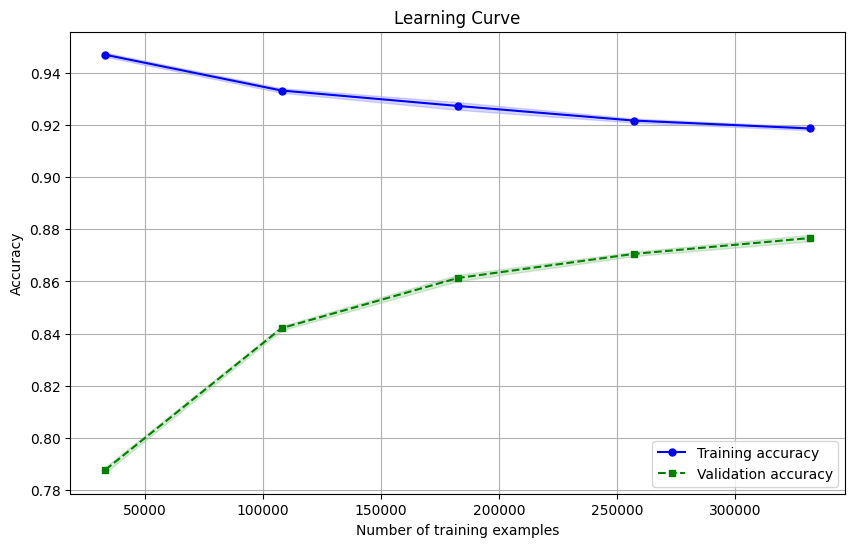

In [25]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train, cv=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Learning Curve')
plt.show()

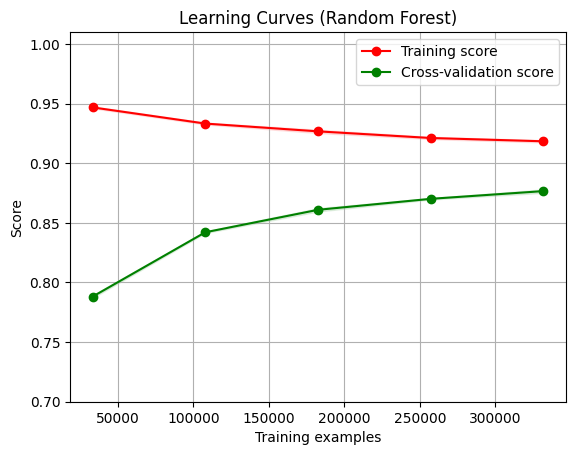

In [26]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

#learning curve
title = "Learning Curves (Random Forest)"
plot_learning_curve(best_model, title, X_train, y_train, ylim=(0.7, 1.01), cv=5, n_jobs=-1)

plt.show()

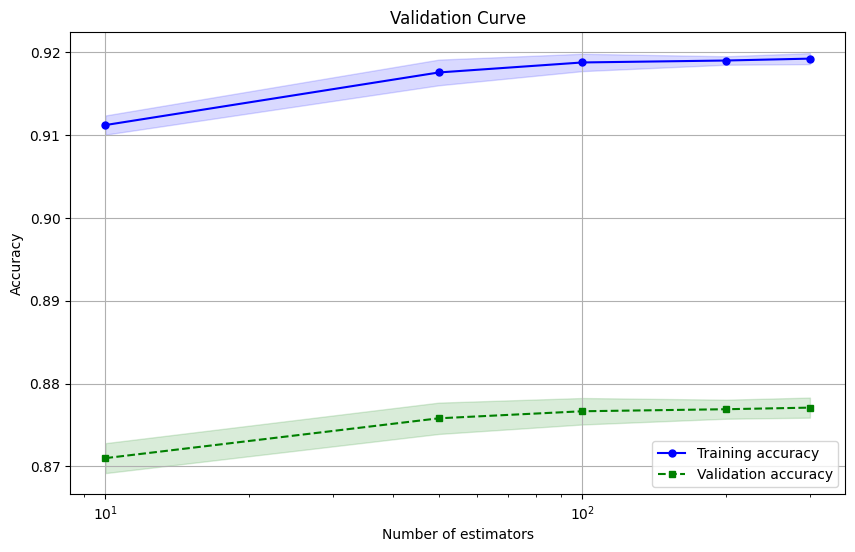

In [27]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier

param_range = [10, 50, 100, 200, 300]

train_scores, test_scores = validation_curve(
    RandomForestClassifier(**best_params),
    X_train,
    y_train,
    param_name="n_estimators",
    param_range=param_range,
    cv=5
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Validation Curve')
plt.show()

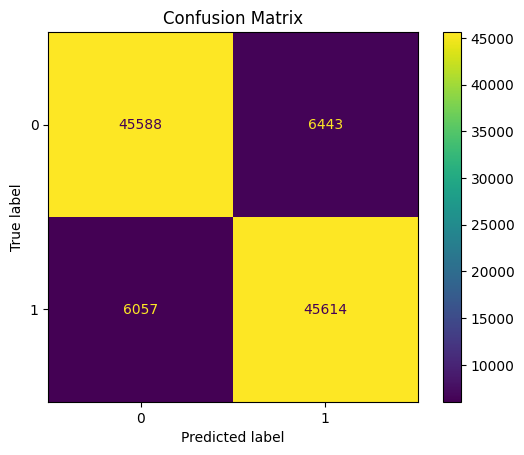

In [28]:
# Confusion Matrix
cm = confusion_matrix(y_test, best_model.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

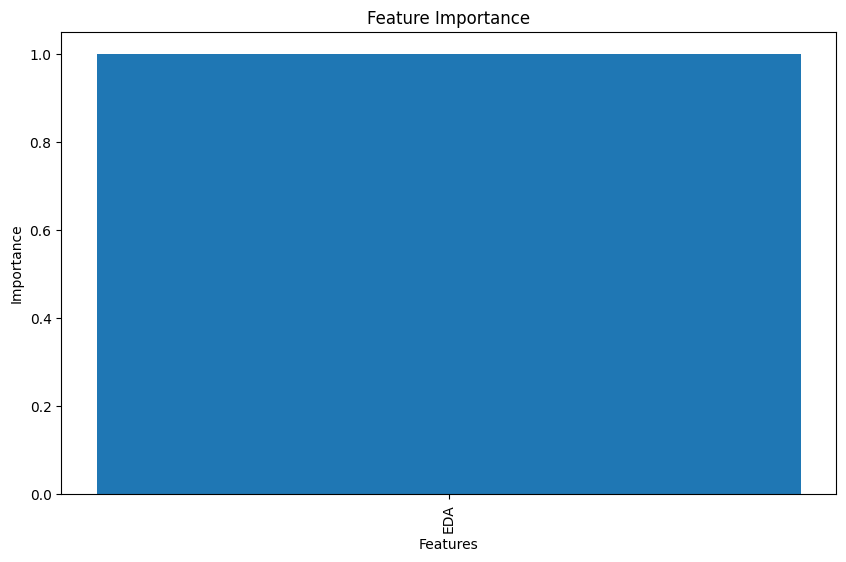

In [29]:
# Feature Importance Plot
feature_importances = best_model.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]
features = X_train.columns

plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances[sorted_idx], align='center')
plt.xticks(range(X_train.shape[1]), features[sorted_idx], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

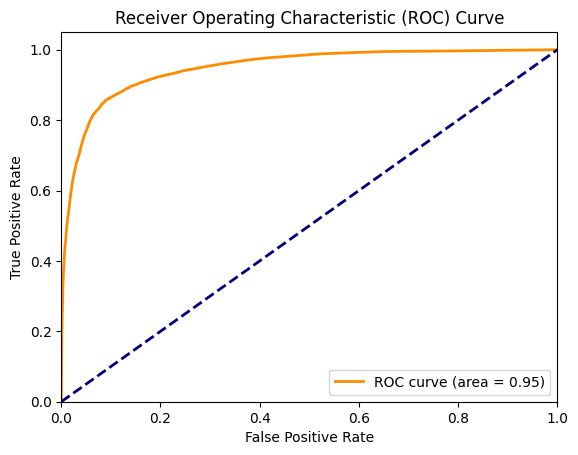

In [30]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming best_model is already defined and fitted

# Get predicted probabilities
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


FINAL

In [31]:
import joblib
joblib.dump(best_model, 'Oversample_model_EDA.pkl')

['Oversample_model_EDA.pkl']

In [32]:
X_test

,EDA
151474,-0.715409
154778,-0.690377
496926,1.599202
459636,2.915900
470144,-0.194792
...,...
398368,-0.667377
363398,-0.750516
150496,-0.708582
66439,-0.473660


In [34]:
loaded_model = joblib.load('Oversample_model_EDA.pkl')
new_data_predictions = loaded_model.predict(X_test)
predictions_df = pd.DataFrame(new_data_predictions, columns=['predictions'])
predictions_df

,predictions
0,0.0
1,0.0
2,1.0
3,1.0
4,0.0
...,...
103697,1.0
103698,1.0
103699,0.0
103700,1.0


In [35]:
y_test

151474    0.0
154778    0.0
496926    1.0
459636    1.0
470144    1.0
         ... 
398368    1.0
363398    1.0
150496    0.0
66439     1.0
234120    0.0
Name: labels, Length: 103702, dtype: float64

In [36]:
traget_df = y_test.reset_index(drop=True)

In [37]:
aligned_df = pd.concat([predictions_df, traget_df], axis=1)

aligned_df

,predictions,labels
0,0.0,0.0
1,0.0,0.0
2,1.0,1.0
3,1.0,1.0
4,0.0,1.0
...,...,...
103697,1.0,1.0
103698,1.0,1.0
103699,0.0,0.0
103700,1.0,1.0


In [38]:
same_values = (aligned_df['predictions'] == aligned_df['labels']).sum()
different_values = (aligned_df['predictions'] != aligned_df['labels']).sum()

print("Number of rows with the same values:", same_values)
print("Number of rows with different values:", different_values)

Number of rows with the same values: 91202
Number of rows with different values: 12500
